In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("WRIED_p_TCGA_143_147_150_Hahn_N_GenomeWideSNP_6_F07_799994.nocnv_grch38.seg.v2.txt", sep='\t')
df2 = pd.read_csv("TCGA-B6-A0WW-01A-11D-A893-36.WholeGenome.RP-1657.cr.igv.reheader.seg.txt", sep='\t')

In [3]:
for df in [df1, df2]:
    df.columns = [col.strip() for col in df.columns]
    df['Start'] = df['Start'].astype(int)
    df['End'] = df['End'].astype(int)
    df['Num_Probes'] = df['Num_Probes'].astype(int)
    df['Segment_Mean'] = df['Segment_Mean'].astype(float)

df1["Chromosome"] = "chr" + df1["Chromosome"]
df1.rename(columns={'GDC_Aliquot': 'GDC_Aliquot_ID'}, inplace=True)

In [4]:
df1.head()

,GDC_Aliquot_ID,Chromosome,Start,End,Num_Probes,Segment_Mean
0,a76e695c-a58b-40a7-9396-7e88734075f2,chr1,3301765,247650984,128894,0.0102
1,a76e695c-a58b-40a7-9396-7e88734075f2,chr2,480597,241537572,131362,0.0132
2,a76e695c-a58b-40a7-9396-7e88734075f2,chr3,2170634,197812401,106517,0.0111
3,a76e695c-a58b-40a7-9396-7e88734075f2,chr4,1059384,78381210,43006,0.0133
4,a76e695c-a58b-40a7-9396-7e88734075f2,chr4,78381703,78383072,2,-1.8840


In [5]:
df2.head()

,GDC_Aliquot_ID,Chromosome,Start,End,Num_Probes,Segment_Mean
0,TCGA-B6-A0WW-01A-11D-A893-36,chr1,17001,3442000,2477,-0.584300
1,TCGA-B6-A0WW-01A-11D-A893-36,chr1,3442001,4989000,1534,-0.589811
2,TCGA-B6-A0WW-01A-11D-A893-36,chr1,4989001,6237000,1244,-0.596118
3,TCGA-B6-A0WW-01A-11D-A893-36,chr1,6237001,6617000,380,-0.592201
4,TCGA-B6-A0WW-01A-11D-A893-36,chr1,6617001,7046000,429,-0.613918


In [6]:
df = pd.concat([df1, df2], axis=0)
df.head()

,GDC_Aliquot_ID,Chromosome,Start,End,Num_Probes,Segment_Mean
0,a76e695c-a58b-40a7-9396-7e88734075f2,chr1,3301765,247650984,128894,0.0102
1,a76e695c-a58b-40a7-9396-7e88734075f2,chr2,480597,241537572,131362,0.0132
2,a76e695c-a58b-40a7-9396-7e88734075f2,chr3,2170634,197812401,106517,0.0111
3,a76e695c-a58b-40a7-9396-7e88734075f2,chr4,1059384,78381210,43006,0.0133
4,a76e695c-a58b-40a7-9396-7e88734075f2,chr4,78381703,78383072,2,-1.8840


In [7]:
df.reset_index(drop=True, inplace=True)
df.head()

,GDC_Aliquot_ID,Chromosome,Start,End,Num_Probes,Segment_Mean
0,a76e695c-a58b-40a7-9396-7e88734075f2,chr1,3301765,247650984,128894,0.0102
1,a76e695c-a58b-40a7-9396-7e88734075f2,chr2,480597,241537572,131362,0.0132
2,a76e695c-a58b-40a7-9396-7e88734075f2,chr3,2170634,197812401,106517,0.0111
3,a76e695c-a58b-40a7-9396-7e88734075f2,chr4,1059384,78381210,43006,0.0133
4,a76e695c-a58b-40a7-9396-7e88734075f2,chr4,78381703,78383072,2,-1.8840


In [8]:
mean_val = df['Segment_Mean'].mean()
std_val = df['Segment_Mean'].std()

print(mean_val, "\n", std_val)

-0.8811248351101635 
 3.595784541469069


In [9]:
df['Z_Score'] = (df['Segment_Mean'] - mean_val) / std_val
df.head()

,GDC_Aliquot_ID,Chromosome,Start,End,Num_Probes,Segment_Mean,Z_Score
0,a76e695c-a58b-40a7-9396-7e88734075f2,chr1,3301765,247650984,128894,0.0102,0.247880
1,a76e695c-a58b-40a7-9396-7e88734075f2,chr2,480597,241537572,131362,0.0132,0.248715
2,a76e695c-a58b-40a7-9396-7e88734075f2,chr3,2170634,197812401,106517,0.0111,0.248131
3,a76e695c-a58b-40a7-9396-7e88734075f2,chr4,1059384,78381210,43006,0.0133,0.248743
4,a76e695c-a58b-40a7-9396-7e88734075f2,chr4,78381703,78383072,2,-1.8840,-0.278903


In [10]:
def classify(z):
    if z > 2:
        return 'Amplified'
    elif z < -2:
        return 'Deleted'
    else:
        return 'Normal'

df['CNV_Type'] = df['Z_Score'].apply(classify)

In [11]:
df.head()

,GDC_Aliquot_ID,Chromosome,Start,End,Num_Probes,Segment_Mean,Z_Score,CNV_Type
0,a76e695c-a58b-40a7-9396-7e88734075f2,chr1,3301765,247650984,128894,0.0102,0.247880,Normal
1,a76e695c-a58b-40a7-9396-7e88734075f2,chr2,480597,241537572,131362,0.0132,0.248715,Normal
2,a76e695c-a58b-40a7-9396-7e88734075f2,chr3,2170634,197812401,106517,0.0111,0.248131,Normal
3,a76e695c-a58b-40a7-9396-7e88734075f2,chr4,1059384,78381210,43006,0.0133,0.248743,Normal
4,a76e695c-a58b-40a7-9396-7e88734075f2,chr4,78381703,78383072,2,-1.8840,-0.278903,Normal


In [12]:
df['CNV_Type'].value_counts()

CNV_Type
Normal     1376
Deleted      31
Name: count, dtype: int64

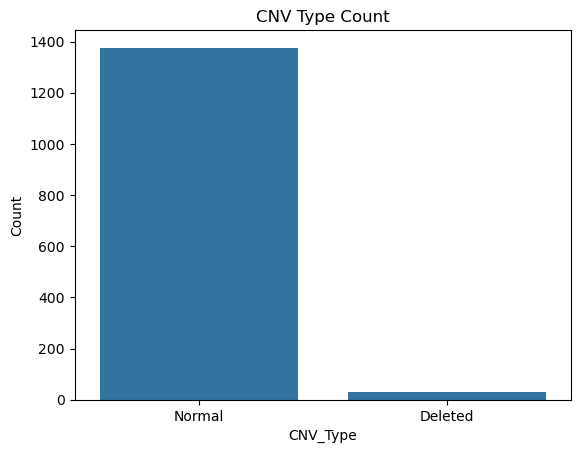

In [13]:
sns.countplot(data=df, x='CNV_Type')

plt.title("CNV Type Count")
plt.ylabel("Count")
plt.show()

In [14]:
heatmap_data = df.groupby(['Chromosome', 'CNV_Type']).size().unstack().fillna(0)
heatmap_data.head()

CNV_Type,Deleted,Normal
Chromosome,,
chr1,2.0,74.0
chr10,2.0,8.0
chr11,0.0,83.0
chr12,0.0,10.0
chr13,0.0,99.0


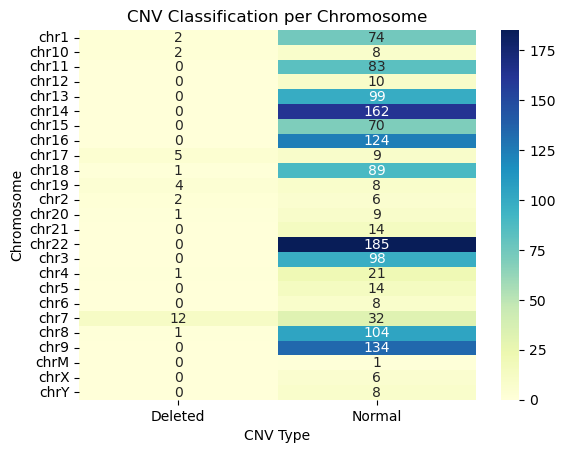

In [15]:
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='g')

plt.title("CNV Classification per Chromosome")
plt.ylabel("Chromosome")
plt.xlabel("CNV Type")
plt.show()

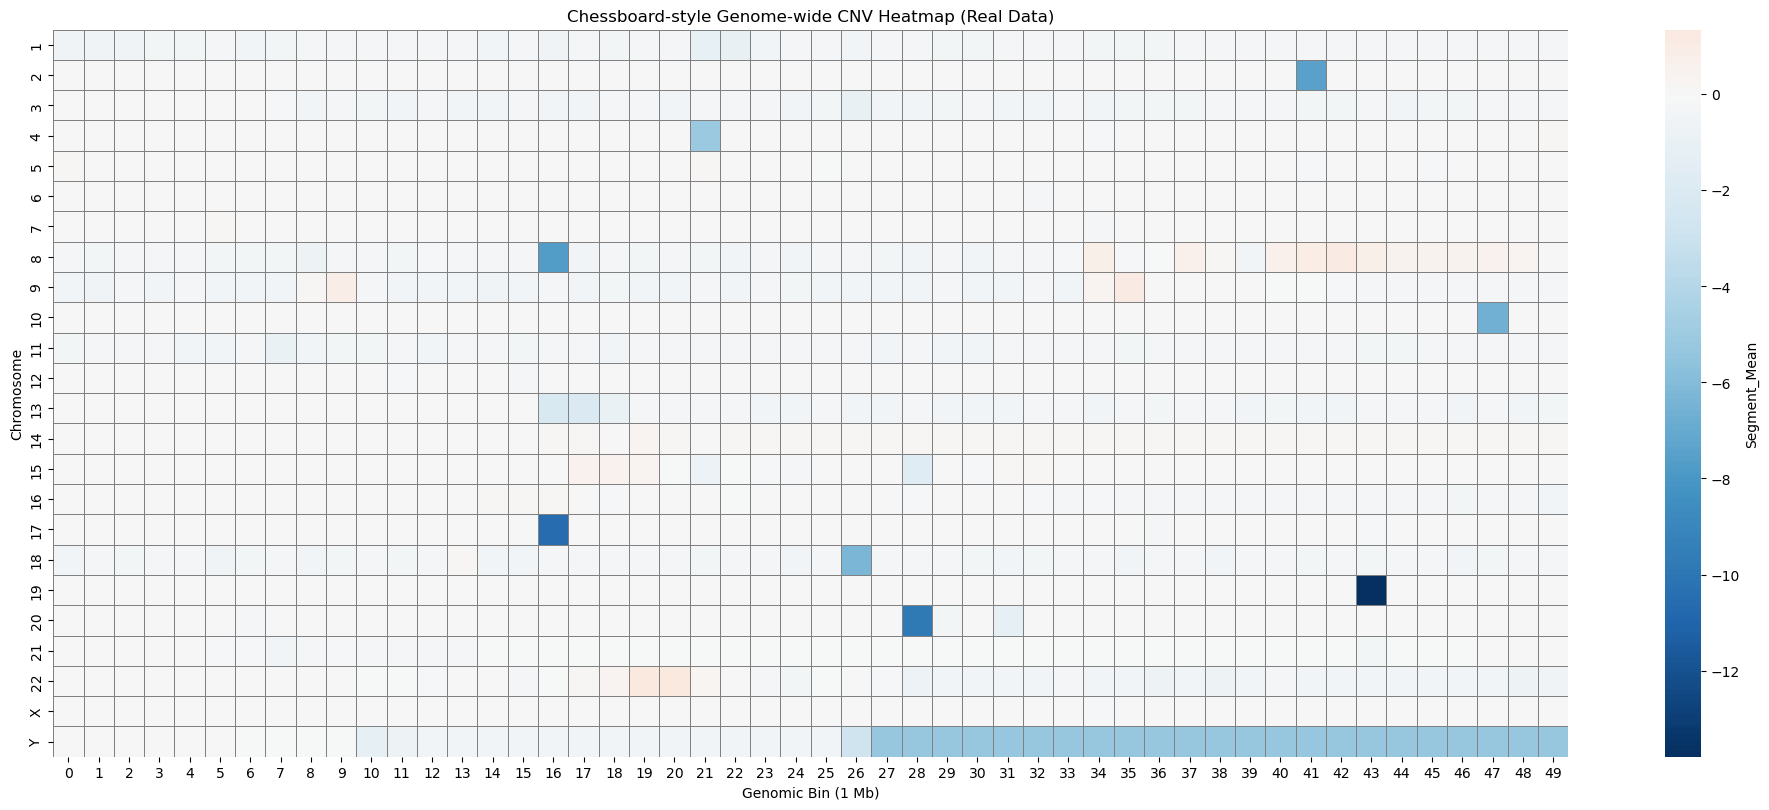

In [16]:
# --- Step 2: Create a heatmap matrix from real CNV data ---

# Define chromosomes and genomic bins (adjust bin size or count as per your data)
chromosomes = [str(i) for i in range(1, 23)] + ['X', 'Y']
bin_size = 1_000_000  # 1Mb bins
max_bin = 50  # example, can be adjusted based on genome length or data coverage

# Initialize matrix to hold average Segment_Mean per chromosome per bin
heatmap_matrix = pd.DataFrame(
    np.nan,  # Initialize with NaNs to fill in later
    index=chromosomes,
    columns=range(max_bin)
)

# Function to map genomic coordinates to bins
def get_bin(start_pos, bin_size):
    return start_pos // bin_size

# Aggregate Segment_Mean values into bins per chromosome
for chrom in chromosomes:
    chrom_df = df[df['Chromosome'].str.replace('chr', '') == chrom]
    for bin_idx in range(max_bin):
        bin_start = bin_idx * bin_size
        bin_end = bin_start + bin_size
        # Select segments overlapping this bin
        bin_segments = chrom_df[
            (chrom_df['Start'] < bin_end) & (chrom_df['End'] > bin_start)
        ]
        if not bin_segments.empty:
            # Take mean of Segment_Mean within overlapping segments
            heatmap_matrix.loc[chrom, bin_idx] = bin_segments['Segment_Mean'].mean()

# Fill NaNs with 0 (or another value you prefer)
heatmap_matrix.fillna(0, inplace=True)

# --- Step 3: Create checkerboard pattern of same shape as heatmap matrix ---
checkerboard = np.zeros_like(heatmap_matrix, dtype=int)
for i in range(checkerboard.shape[0]):
    for j in range(checkerboard.shape[1]):
        # Color1 if sum of indices even, Color2 if odd (classic checkerboard)
        checkerboard[i, j] = (i + j) % 2

# --- Step 4: Plot checkerboard + heatmap overlay ---

fig, ax = plt.subplots(figsize=(20, 8))

# Plot checkerboard background with low opacity
ax.imshow(checkerboard, cmap='Greys', interpolation='none', alpha=0.3)

# Overlay heatmap on top
sns.heatmap(
    heatmap_matrix,
    cmap='RdBu_r',
    center=0,
    ax=ax,
    cbar_kws={'label': 'Segment_Mean'},
    linewidths=0.5,
    linecolor='gray',
    square=True
)

# Labels and title
ax.set_title('Chessboard-style Genome-wide CNV Heatmap (Real Data)')
ax.set_xlabel('Genomic Bin (1 Mb)')
ax.set_ylabel('Chromosome')

plt.tight_layout()
plt.show()